In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge

In [235]:
df = pd.read_csv("/home/emmanuel/Documents/DataScience/winequality-white.csv", sep =";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [236]:
df.shape

(4898, 12)

In [237]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [239]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f4ff04b8be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4ff0494e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4ff04b8880>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4ff0494460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4ff0494f70>],
 'means': []}

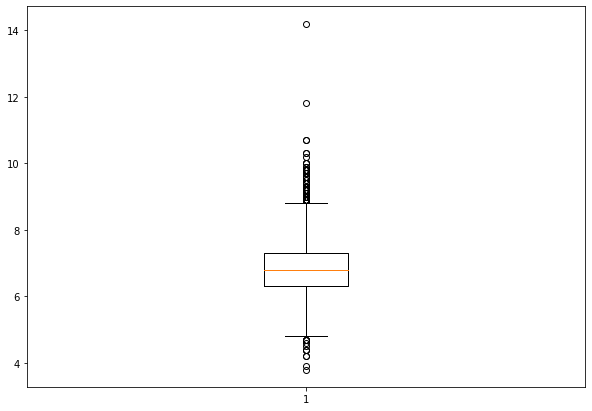

In [240]:
fig = plt.figure(figsize = (10, 7))
plt.boxplot(df['fixed acidity'])

# function to create diagnostic plots

In [241]:
def plotvariable(data, variable):
    plt.figure(figsize=(20,5))
    
    #histogram
    plt.subplot(1,2,1)
    plt.hist(data[variable], alpha=0.5)
    
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(data[variable])
    plt.show()

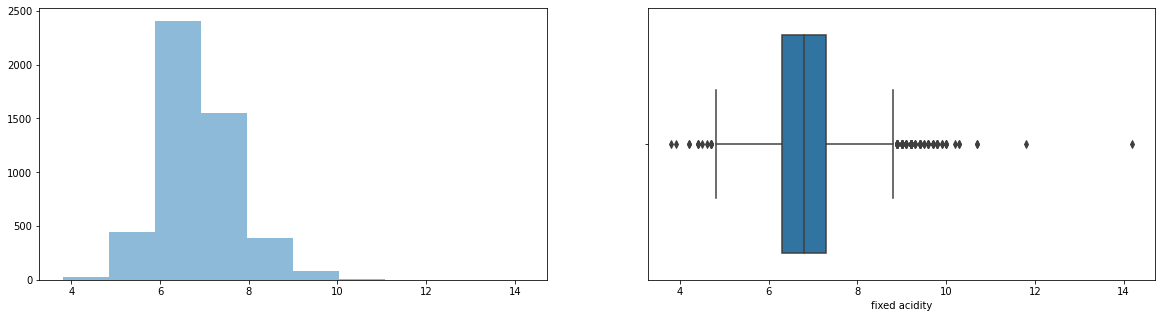

In [242]:
plotvariable(df, 'fixed acidity')

# find boundaries of upper and lower limit

In [243]:
def find_boundary(data, variables):
    Q1 = data[variables].quantile(.25)
    Q3 = data[variables].quantile(.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - 1.5*IQR
    upper_boundary = Q3 + 1.5*IQR
    
    return lower_boundary, upper_boundary

In [244]:
lower_fixed, upper_fixed = find_boundary(df, 'fixed acidity')
print("upper_fixed for fixed_acidity is: ", upper_fixed)
print("lower_fixed for fixed_acidity is: ", lower_fixed)

upper_fixed for fixed_acidity is:  8.8
lower_fixed for fixed_acidity is:  4.8


In [245]:
df['fixed acidity'] = np.where(df['fixed acidity']>upper_fixed, upper_fixed, 
                                np.where(df['fixed acidity']<lower_fixed, lower_fixed, df['fixed acidity']))

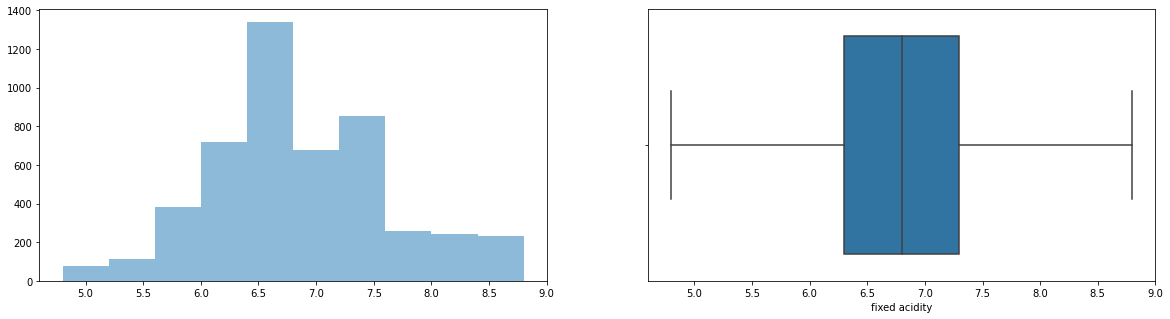

In [246]:
plotvariable(df, 'fixed acidity')

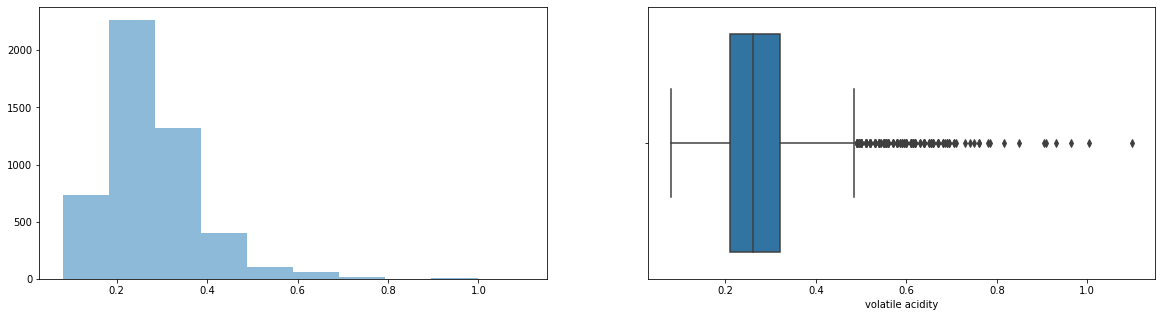

In [247]:
plotvariable(df, 'volatile acidity')

In [248]:
lower_fixed, upper_fixed = find_boundary(df, 'volatile acidity')
print("upper_fixed for fixed_acidity is: ", upper_fixed)
print("lower_fixed for fixed_acidity is: ", lower_fixed)

upper_fixed for fixed_acidity is:  0.48500000000000004
lower_fixed for fixed_acidity is:  0.04499999999999996


In [249]:
df['volatile acidity'] = np.where(df['volatile acidity']>upper_fixed, upper_fixed, 
                                np.where(df['volatile acidity']<lower_fixed, lower_fixed, df['volatile acidity']))

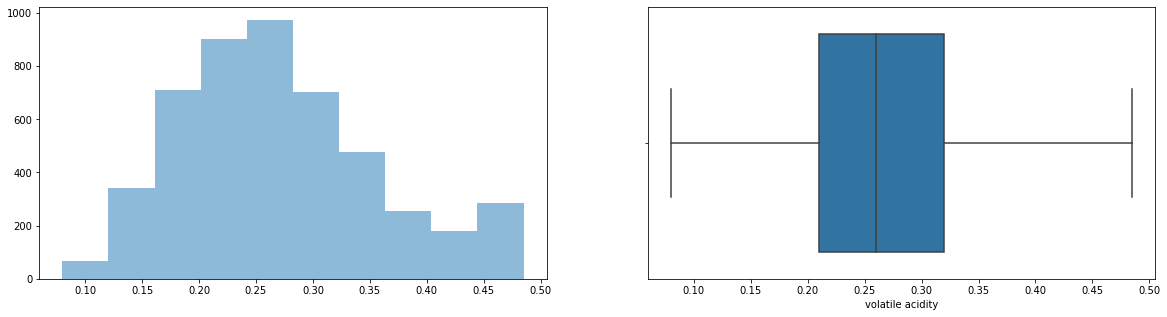

In [250]:
plotvariable(df, 'volatile acidity')

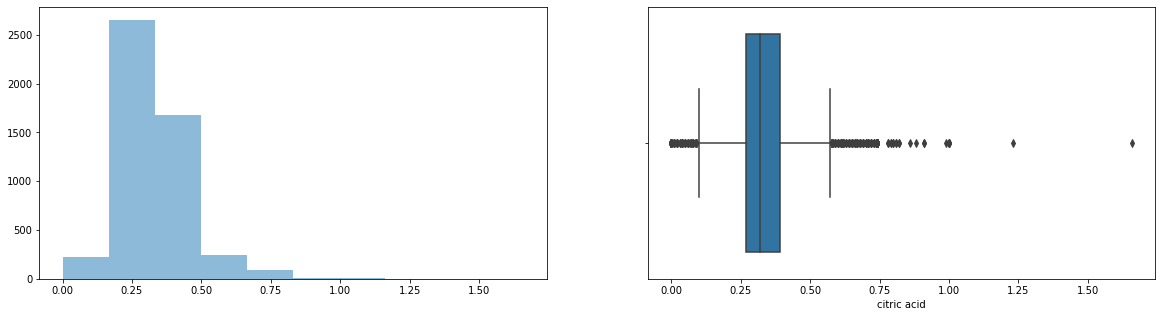

In [251]:
plotvariable(df, 'citric acid')

In [252]:
lower_fixed, upper_fixed = find_boundary(df, 'citric acid')
print("upper_fixed for fixed_acidity is: ", upper_fixed)
print("lower_fixed for fixed_acidity is: ", lower_fixed)

upper_fixed for fixed_acidity is:  0.5700000000000001
lower_fixed for fixed_acidity is:  0.09000000000000002


In [253]:
df['citric acid'] = np.where(df['citric acid']>upper_fixed, upper_fixed, 
                                np.where(df['citric acid']<lower_fixed, lower_fixed, df['citric acid']))

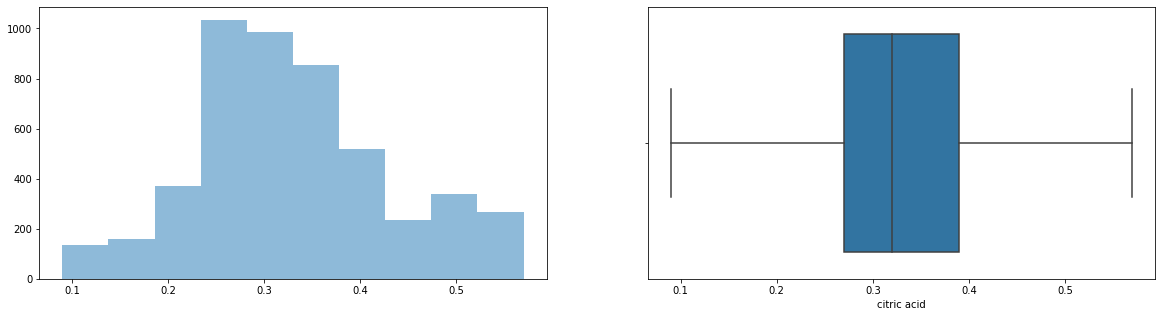

In [254]:
plotvariable(df, 'citric acid')

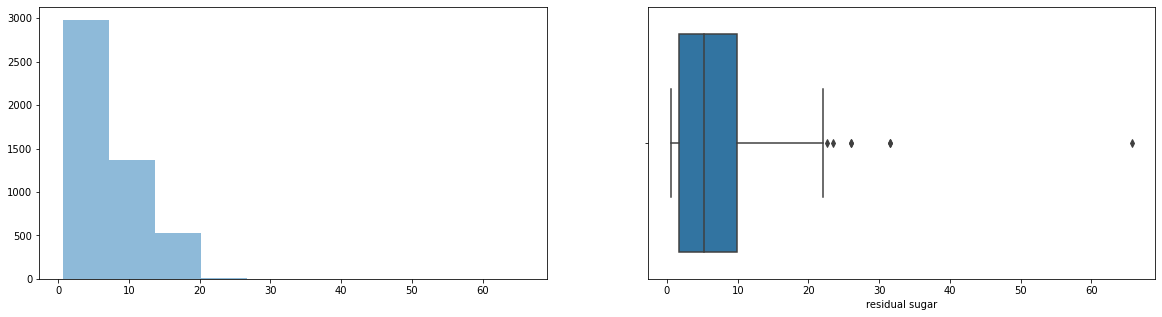

In [255]:
plotvariable(df, 'residual sugar')

In [256]:
lower_fixed, upper_fixed = find_boundary(df, 'residual sugar')
print("upper_fixed for fixed_acidity is: ", upper_fixed)
print("lower_fixed for fixed_acidity is: ", lower_fixed)

upper_fixed for fixed_acidity is:  22.200000000000003
lower_fixed for fixed_acidity is:  -10.600000000000001


In [257]:
df['residual sugar'] = np.where(df['residual sugar']>upper_fixed, upper_fixed, 
                                np.where(df['residual sugar']<lower_fixed, lower_fixed, df['residual sugar']))

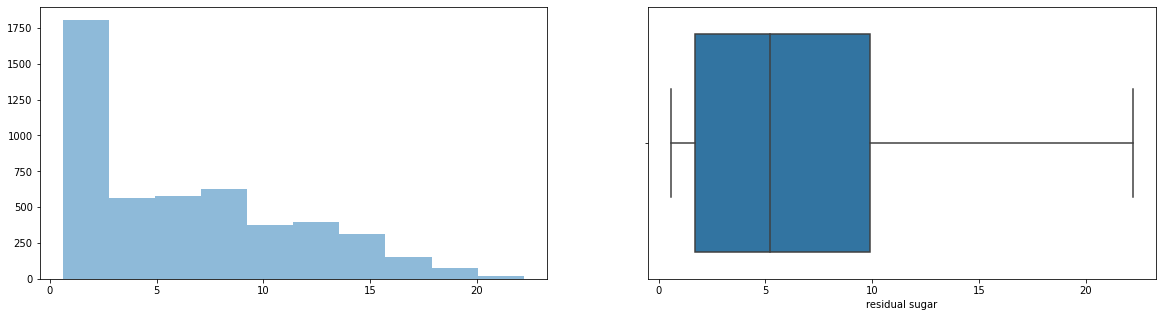

In [258]:
plotvariable(df, 'residual sugar')

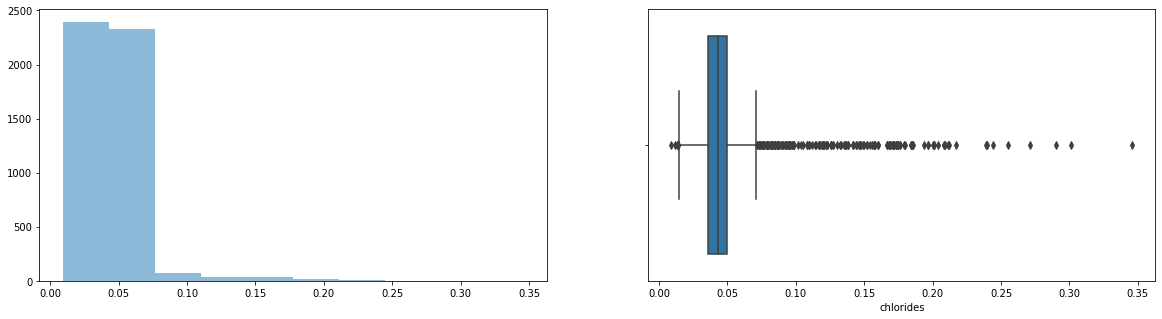

In [259]:
plotvariable(df, 'chlorides')

In [260]:
lower_fixed, upper_fixed = find_boundary(df, 'chlorides')
print("upper_fixed for fixed_acidity is: ", upper_fixed)
print("lower_fixed for fixed_acidity is: ", lower_fixed)

upper_fixed for fixed_acidity is:  0.07100000000000001
lower_fixed for fixed_acidity is:  0.014999999999999989


In [261]:
df['chlorides'] = np.where(df['chlorides']>upper_fixed, upper_fixed, 
                                np.where(df['chlorides']<lower_fixed, lower_fixed, df['chlorides']))

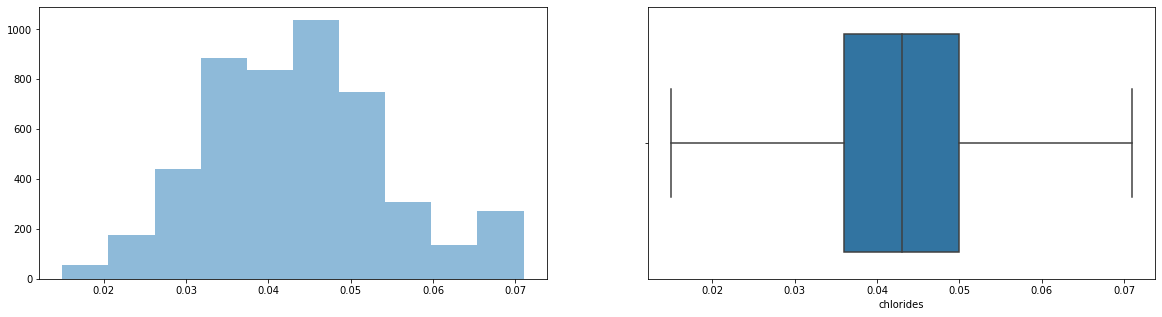

In [262]:
plotvariable(df, 'chlorides')

In [263]:
!pip install statsmodels

You should consider upgrading via the '/home/emmanuel/notebook/jupyterenv/bin/python -m pip install --upgrade pip' command.


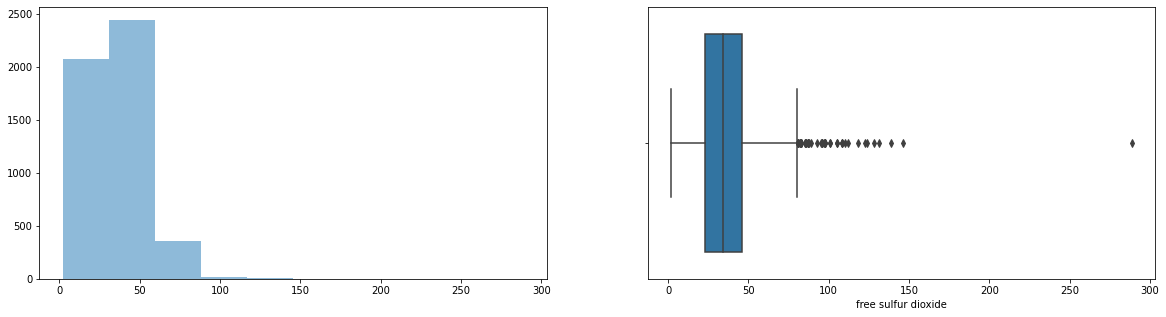

In [264]:
plotvariable(df, 'free sulfur dioxide')

In [265]:
lower_fixed, upper_fixed = find_boundary(df, 'free sulfur dioxide')
print("upper_fixed for fixed_acidity is: ", upper_fixed)
print("lower_fixed for fixed_acidity is: ", lower_fixed)

upper_fixed for fixed_acidity is:  80.5
lower_fixed for fixed_acidity is:  -11.5


In [266]:
df['free sulfur dioxide'] = np.where(df['free sulfur dioxide']>upper_fixed, upper_fixed, 
                                np.where(df['free sulfur dioxide']<lower_fixed, lower_fixed, df['free sulfur dioxide']))

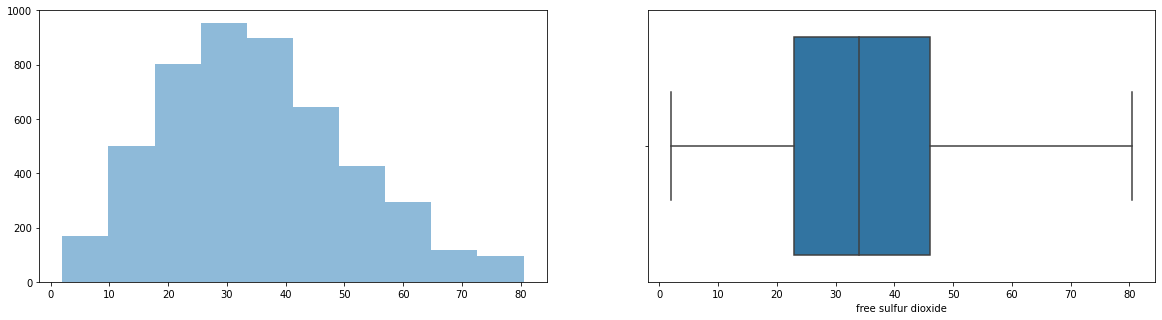

In [267]:
plotvariable(df, 'free sulfur dioxide')

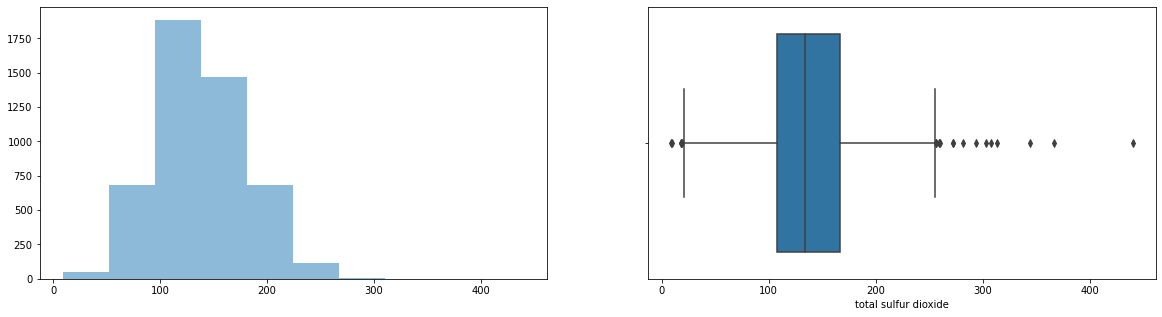

In [268]:
plotvariable(df, 'total sulfur dioxide')

In [269]:
lower_fixed, upper_fixed = find_boundary(df, 'total sulfur dioxide')
print("upper_fixed for fixed_acidity is: ", upper_fixed)
print("lower_fixed for fixed_acidity is: ", lower_fixed)

upper_fixed for fixed_acidity is:  255.5
lower_fixed for fixed_acidity is:  19.5


In [270]:
df['total sulfur dioxide'] = np.where(df['total sulfur dioxide']>upper_fixed, upper_fixed, 
                                np.where(df['total sulfur dioxide']<lower_fixed, lower_fixed, df['total sulfur dioxide']))

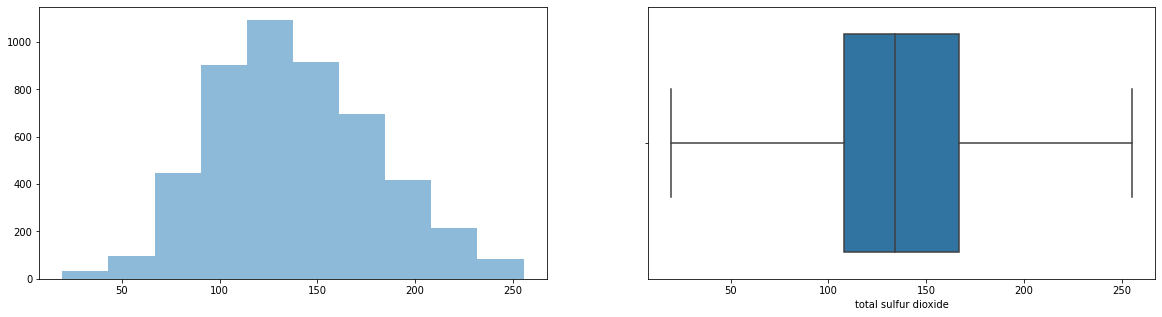

In [271]:
plotvariable(df, 'total sulfur dioxide')

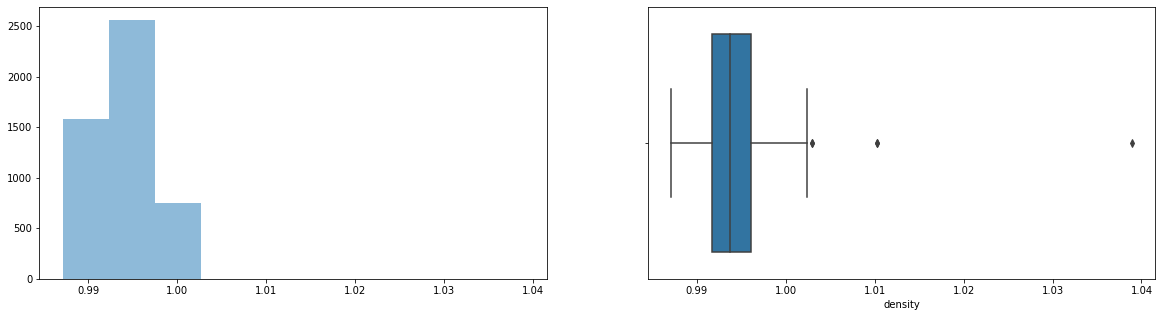

In [272]:
plotvariable(df, 'density')

In [273]:
lower_fixed, upper_fixed = find_boundary(df, 'density')
print("upper_fixed for fixed_acidity is: ", upper_fixed)
print("lower_fixed for fixed_acidity is: ", lower_fixed)

upper_fixed for fixed_acidity is:  1.0026662499999999
lower_fixed for fixed_acidity is:  0.9851562500000002


In [274]:
df['density'] = np.where(df['density']>upper_fixed, upper_fixed, 
                                np.where(df['density']<lower_fixed, lower_fixed, df['density']))

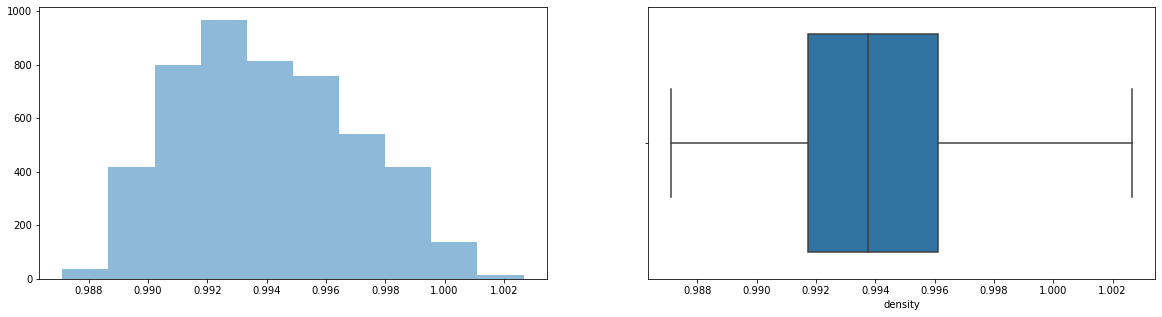

In [275]:
plotvariable(df, 'density')

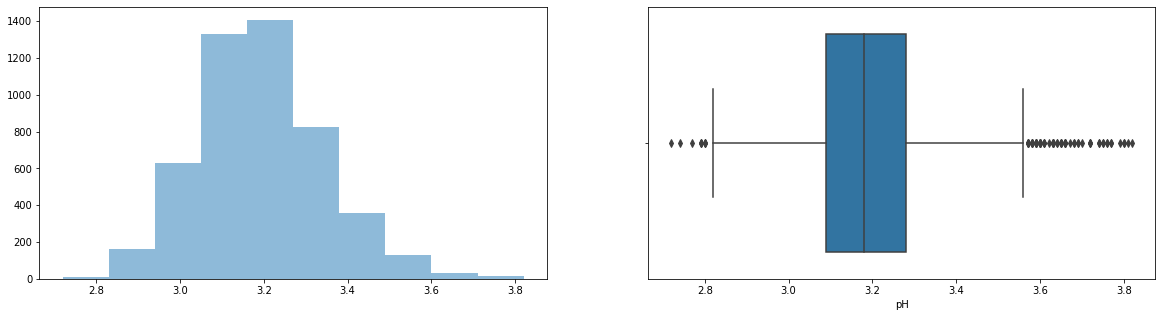

In [276]:
plotvariable(df, 'pH')

In [277]:
lower_fixed, upper_fixed = find_boundary(df, 'pH')
print("upper_fixed for fixed_acidity is: ", upper_fixed)
print("lower_fixed for fixed_acidity is: ", lower_fixed)

upper_fixed for fixed_acidity is:  3.5649999999999995
lower_fixed for fixed_acidity is:  2.8049999999999997


In [278]:
df['pH'] = np.where(df['pH']>upper_fixed, upper_fixed, 
                                np.where(df['pH']<lower_fixed, lower_fixed, df['pH']))

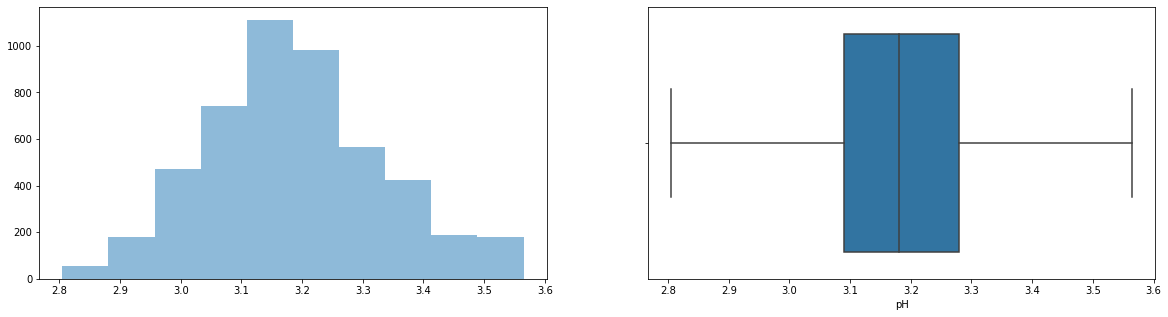

In [279]:
plotvariable(df, 'pH')

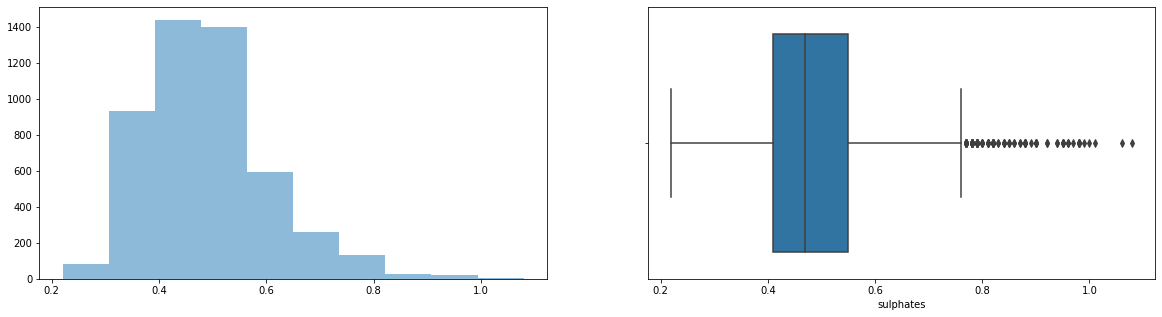

In [280]:
plotvariable(df, 'sulphates')

In [281]:
lower_fixed, upper_fixed = find_boundary(df, 'sulphates')
print("upper_fixed for fixed_acidity is: ", upper_fixed)
print("lower_fixed for fixed_acidity is: ", lower_fixed)

upper_fixed for fixed_acidity is:  0.7600000000000001
lower_fixed for fixed_acidity is:  0.19999999999999987


In [282]:
df['sulphates'] = np.where(df['sulphates']>upper_fixed, upper_fixed, 
                                np.where(df['sulphates']<lower_fixed, lower_fixed, df['sulphates']))

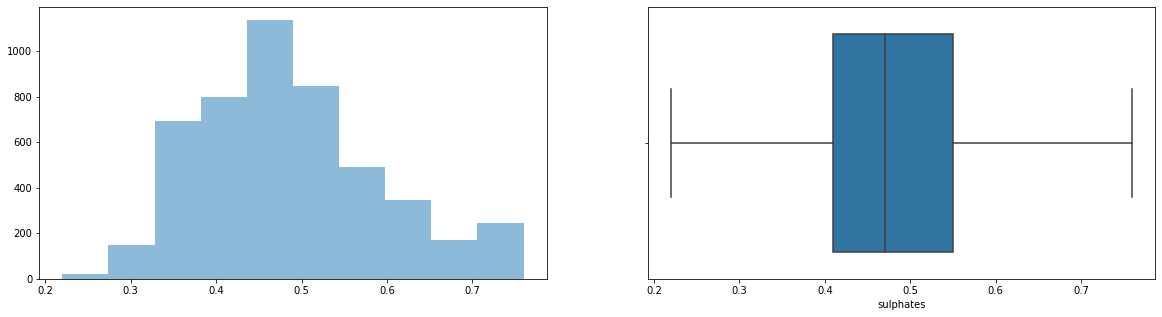

In [283]:
plotvariable(df, 'sulphates')

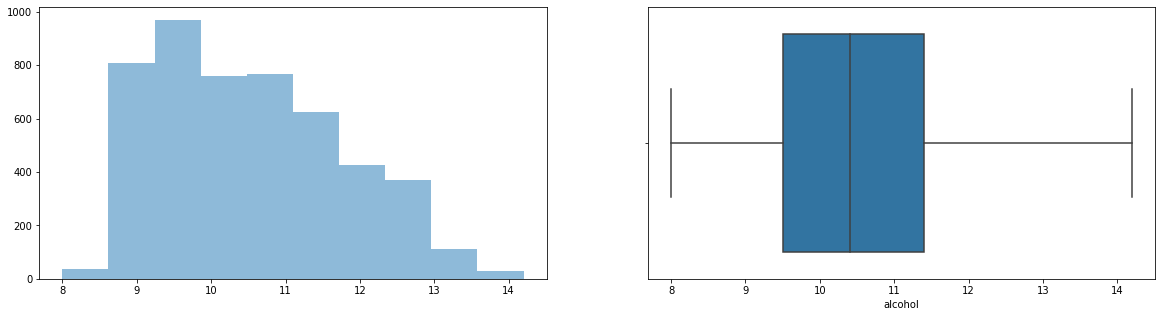

In [284]:
plotvariable(df, 'alcohol')

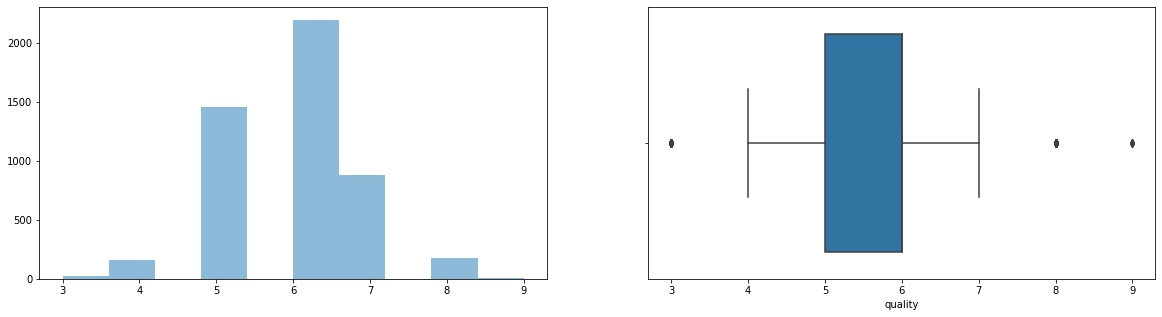

In [285]:
plotvariable(df, 'quality')

In [286]:
df.shape

(4898, 12)

In [287]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.843069,0.274126,0.330196,6.376756,0.043510,35.101776,138.233156,0.994017,3.187104,0.487771,10.514267,5.877909
std,0.800015,0.087203,0.103506,4.983099,0.011295,16.008071,41.959107,0.002910,0.147199,0.107641,1.230621,0.885639
min,4.800000,0.080000,0.090000,0.600000,0.015000,2.000000,19.500000,0.987110,2.805000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,8.800000,0.485000,0.570000,22.200000,0.071000,80.500000,255.500000,1.002666,3.565000,0.760000,14.200000,9.000000


<AxesSubplot:>

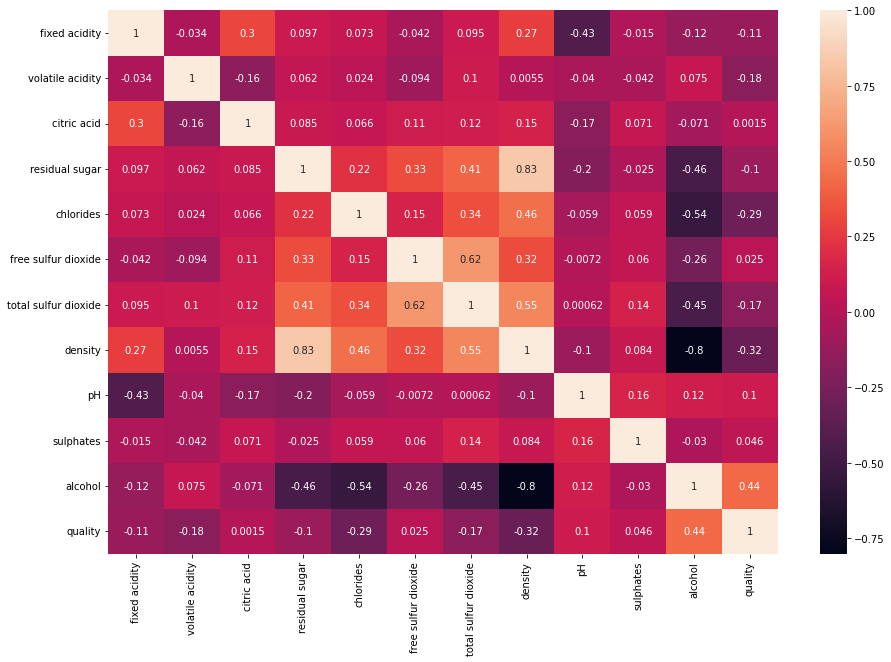

In [288]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [289]:
y = df['quality']
X = df.drop(columns=['quality', 'citric acid', 'fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol'])

In [290]:
def calcu_mult(df):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif

In [291]:
calcu_mult(X)

,variables,VIF
0,free sulfur dioxide,9.379048
1,total sulfur dioxide,9.379048


In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=10)
X_val.shape

(980, 2)

In [293]:
Min_Max_Scale = MinMaxScaler()
X_train_Min = pd.DataFrame(Min_Max_Scale.fit_transform(X_train))
X_train_Min.shape


(2938, 2)

In [294]:
Min_Max_Scale = MinMaxScaler()
X_test_Min = pd.DataFrame(Min_Max_Scale.fit_transform(X_test))
X_test_Min.shape

(980, 2)

In [295]:
model = RandomForestRegressor(random_state=5, max_depth=4)
model.fit(df, X)

RandomForestRegressor(max_depth=4, random_state=5)

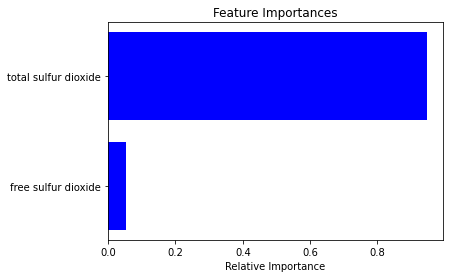

In [296]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-2:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [324]:
model = Ridge()
ridge_model = model.fit(X_val, y_val)
ridge_model

Ridge()

In [325]:
coef_deter = ridge_model.score(X_val, y_val)
coef_deter

0.05533316918932463

In [326]:
#Adjusted R2
1 - (1-ridge_model.score(X_val, y_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)

0.05339935786729666

In [327]:
y_predict = ridge_model.predict(X_test)

In [328]:
print("MAE : ",mean_absolute_error(y_test, y_predict))
print("MSE : ",mean_squared_error(y_test, y_predict))
print("R2 score : ",r2_score(y_test, y_predict))

MAE :  0.6542305019929112
MSE :  0.7443297916898052
R2 score :  0.0654656015524423


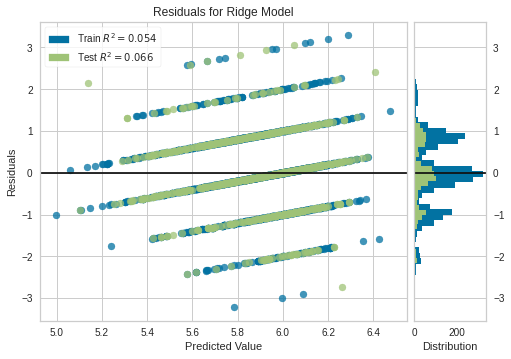

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [329]:
ridge_model = Ridge()
visualizer = ResidualsPlot(new_model, hist=True, qqplot=False)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()